## Set Up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Data

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.shape

(1338, 7)

In [6]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
1185,45,male,23.56,2,no,northeast,8603.8234


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
pd.to_datetime(['2021-08-06'])

DatetimeIndex(['2021-08-06'], dtype='datetime64[ns]', freq=None)

In [21]:
df.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

## Split

Arbitrarily chose a 4:1 split for this data. Consider using sklearn model to do this instead.

In [22]:
1337/5

267.4

In [23]:
train_index = df.sample(1050, random_state=1972).index.to_list()

In [25]:
len(train_index)

1050

In [29]:
test_index = list(set(df.index) - set(train_index))

In [30]:
len(test_index)

288

In [27]:
train = df.iloc[train_index]

In [31]:
test = df.iloc[test_index]

In [32]:
train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [110]:
# train.to_csv('train_set_2021-08-06.csv', index=False)
# test.to_csv('test_set_2021-08-06.csv', index=False)

In [ ]:
# train = pd.read_csv('train_set_2021-08-06.csv')

## Linear Regression: Pass 1

Simple multiple linear regression, using only the non-categorical variables in the data set.

In [17]:
from sklearn.linear_model import LinearRegression

In [111]:
lr = LinearRegression()

In [112]:
model_cols = ['age', 'bmi', 'children', 'charges']

In [113]:
x = train[model_cols[:3]]
y = train[model_cols[-1:]]
lr.fit(x, y)

LinearRegression()

In [114]:
lr.score(x, y)

0.12209702126909583

In [115]:
lr.coef_[0]

array([250.71608981, 301.98673334, 356.18667894])

Didn't like this initial result, try making dummies and including all of the columns

## Linear Regression: Pass 2

In [116]:
model_columns = df.columns.tolist()

In [117]:
train.sample()

,age,sex,bmi,children,smoker,region,charges
1049,49,male,30.9,0,yes,southwest,39727.614


Only need one column for the binary columns (smoker, sex), but need multiple for regions

In [124]:
x2 = train[model_columns[:-2]]

In [125]:
x2 = pd.get_dummies(data=x2, drop_first=True)

In [126]:
x2.sample()

,age,bmi,children,sex_male,smoker_yes
371,57,22.23,0,0,0


In [122]:
regions = pd.get_dummies(train[['region']], drop_first=False)

In [123]:
regions.sample()

,region_northeast,region_northwest,region_southeast,region_southwest
648,1,0,0,0


In [127]:
x2 = pd.merge(x2, regions, left_index=True, right_index=True)

### And train

In [93]:
lr2 = LinearRegression()

In [128]:
y = train[model_cols[-1:]]
lr2.fit(x2, y)

LinearRegression()

In [130]:
lr2.score(x2, y)

0.7444027386880627

In [134]:
x2.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [132]:
lr2.coef_[0]

array([ 2.56142521e+02,  3.51714849e+02,  3.55707550e+02, -9.91701202e+00,
        2.35530224e+04,  6.89061613e+02,  2.99327205e+02, -5.93371817e+02,
       -3.95017002e+02])

In [136]:
dict(zip(x2.columns, lr2.coef_[0]))

{'age': 256.14252136567995,
 'bmi': 351.71484862813725,
 'children': 355.7075496120209,
 'sex_male': -9.917012019334647,
 'smoker_yes': 23553.022361684674,
 'region_northeast': 689.0616134331076,
 'region_northwest': 299.32720479580485,
 'region_southeast': -593.3718166832152,
 'region_southwest': -395.0170015456987}

In [ ]:
##   a1x1 + a2x2 + a3x3 ... anxn + c = y

## Possible conclusions

* Smoking status drives the largest change in healthcare costs.
* Gender does not contribute substantially to healthcare costs.
* Lower costs appear to correlate with living in the southern regions of this country.

## Some Plotting Examples

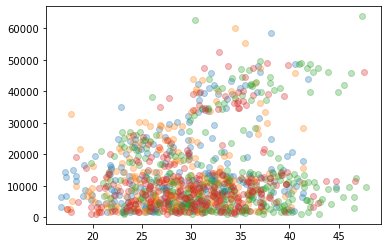

In [133]:
fig, ax = plt.subplots()

grouped = train.groupby('region')

for name, group in grouped:
    ax.scatter(group.bmi, group.charges, alpha=0.3)
    
plt.show()

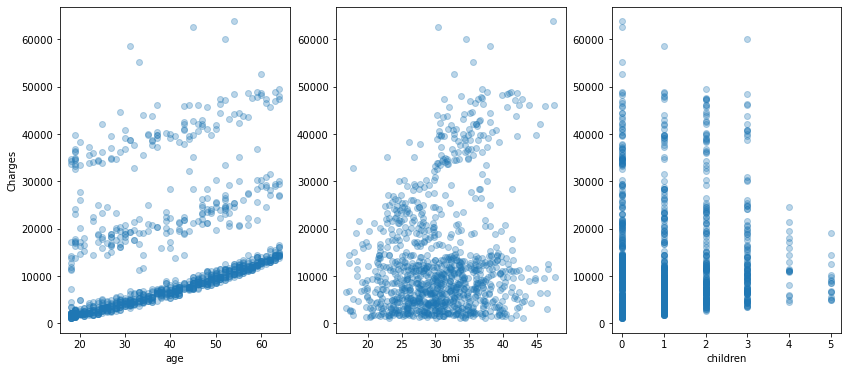

In [107]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

l = ['age', 'bmi', 'children']

for i, ax in enumerate(axs):
    ax.scatter(train[l[i]], train['charges'], alpha=0.3)
    ax.set_xlabel(l[i])
    
axs[0].set_ylabel('Charges')

plt.show()

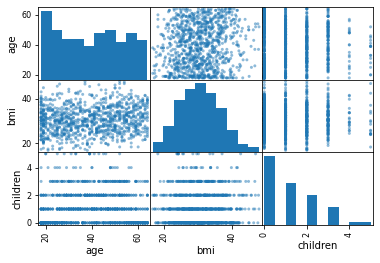

In [41]:
pd.plotting.scatter_matrix(train[model_cols[:3]])
plt.show()